In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_excel('Data_Train.xlsx')

In [4]:
df.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,Null,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,Null,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,Null,8625


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,Null
freq,3849,504,4537,4537,2376,233,423,550,5625,8347


In [8]:
df.describe(include='O').T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,Null,8347


In [9]:
for i in df.columns:
    print(f'The unique values in feature {i} is: ', df[i])

The unique values in feature Airline is:  0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10683, dtype: object
The unique values in feature Date_of_Journey is:  0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object
The unique values in feature Source is:  0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10683, dtype: object
The unique values in feature Destination is:  0        New Delhi
1         Bang

In [3]:
def preprocess(data):
    data.dropna(inplace = True)
    data.drop_duplicates(inplace = True)

    data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
    data['day'] = pd.DatetimeIndex(data['Date_of_Journey']).day
    data['month'] = pd.DatetimeIndex(data['Date_of_Journey']).month
    data['weekday'] = pd.DatetimeIndex(data['Date_of_Journey']).weekday

    data['Total_Stops'] = data['Total_Stops'].replace('non-stop', '0')
    data['Total_Stops'] = data['Total_Stops'].replace('1 stop', '1')
    data['Total_Stops'] = data['Total_Stops'].replace('2 stops', '2')
    data['Total_Stops'] = data['Total_Stops'].replace('3 stops', '3')
    data['Total_Stops'] = data['Total_Stops'].replace('4 stops', '4')

    data['Destination'] = np.where(data['Destination'] == 'New Delhi', 'Delhi', data['Destination'])
    data['Airline'] = np.where(data['Airline'] == 'Jet Airways Business','Jet Airways',data['Airline'])
    data['Airline']=data['Airline'].replace('Vistara Premium economy', 'Vistara')
    data['Airline']=data['Airline'].replace('Multiple carriers Premium economy', 'Multiple carriers')

    arrival_time = []
    for i in data["Arrival_Time"]:
        arrival_time.append(i[:5])
    data['Arrival_Time'] = arrival_time
    data['Arrival_Time_hour'] = pd.DatetimeIndex(data['Arrival_Time']).hour
    data['Arrival_Time_minutes'] = pd.DatetimeIndex(data['Arrival_Time']).minute

    data['Duration_Total_Hour'] = data['Duration'].str.replace('h','*1').str.replace(' ','+').str.replace('m','/60').apply(eval)

    data1 = pd.get_dummies(data, prefix=['Airline','Source','Destination'],columns = ['Airline','Source','Destination'], drop_first = True)
    data1.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Additional_Info','Route'], axis =1, inplace = True)
    return data, data1





In [4]:
data_eda, data_model = preprocess(df)

In [5]:
data_eda

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,weekday,Arrival_Time_hour,Arrival_Time_minutes,Duration_Total_Hour
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10,2h 50m,0,Null,3897,24,3,6,1,10,2.833333
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,Null,7662,5,1,5,13,15,7.416667
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,Null,13882,6,9,4,4,25,19.000000
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,Null,6218,5,12,3,23,30,5.416667
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,Null,13302,3,1,3,21,35,4.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,Null,4107,4,9,2,22,25,2.500000
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,Null,4145,27,4,5,23,20,2.583333
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,Null,7229,27,4,5,11,20,3.000000
10681,Vistara,2019-01-03,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,0,Null,12648,3,1,3,14,10,2.666667


In [13]:
data_model

,Duration,Total_Stops,Price,day,month,weekday,Arrival_Time_hour,Arrival_Time_minutes,Duration_Total_Hour,Airline_Air India,...,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,2h 50m,0,3897,24,3,6,1,10,2.833333,0,...,0,0,0,0,0,0,0,1,0,0
1,7h 25m,2,7662,5,1,5,13,15,7.416667,1,...,0,0,0,0,1,0,0,0,0,0
2,19h,2,13882,6,9,4,4,25,19.000000,0,...,0,0,0,1,0,0,1,0,0,0
3,5h 25m,1,6218,5,12,3,23,30,5.416667,0,...,0,0,0,0,1,0,0,0,0,0
4,4h 45m,1,13302,3,1,3,21,35,4.750000,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2h 30m,0,4107,4,9,2,22,25,2.500000,0,...,0,0,0,0,1,0,0,0,0,0
10679,2h 35m,0,4145,27,4,5,23,20,2.583333,1,...,0,0,0,0,1,0,0,0,0,0
10680,3h,0,7229,27,4,5,11,20,3.000000,0,...,0,0,0,0,0,0,0,1,0,0
10681,2h 40m,0,12648,3,1,3,14,10,2.666667,0,...,0,1,0,0,0,0,0,1,0,0


# EDA

<AxesSubplot:ylabel='Airline'>

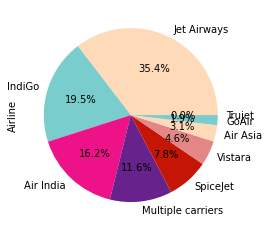

In [14]:
#Market Share of Airlines
round(data_eda['Airline'].value_counts()/df.shape[0]*100,2).plot.pie(autopct = "%1.1f%%", 
                                                                     colors = ["#FFDAB9" , '#79CDCD' , 
                                                                               '#EE1289' , '#68228B', '#C51605', '#E48586'])

<AxesSubplot:xlabel='Duration_Total_Hour', ylabel='Density'>

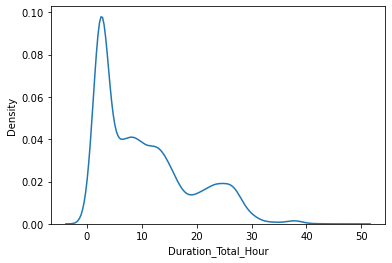

In [15]:
#Highest duration for a flight?
sns.kdeplot(data= data_eda, x="Duration_Total_Hour")

In [16]:
"Most flight's duration is of 5 hours."

"Most flight's duration is of 5 hours."

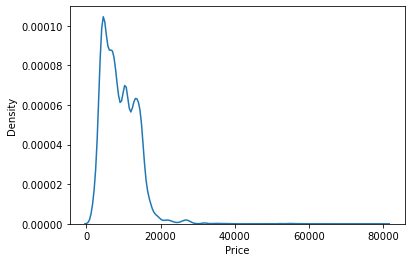

In [17]:
sns.kdeplot(data= data_eda, x="Price")
plt.show()

<AxesSubplot:xlabel='Arrival_Time_hour', ylabel='Count'>

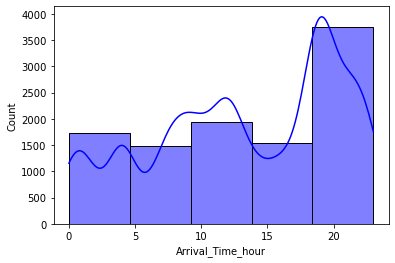

In [18]:
#At what time most flights are arriving? 
sns.histplot(data_eda['Arrival_Time_hour'], bins=5, kde=True, color='blue')


In [19]:
"Most flights have arrival at night time near 8"

'Most flights have arrival at night time near 8'

<AxesSubplot:xlabel='Price', ylabel='Density'>

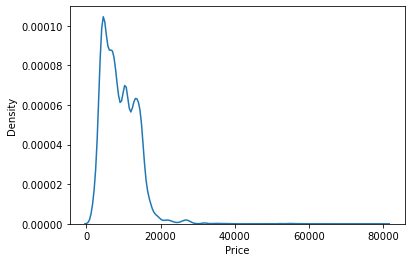

In [20]:
sns.kdeplot(data= data_eda, x="Price")

In [21]:
#Price can't be 0 so we will check what is the minimum price?
data_eda['Price'].min()

1759

In [22]:
"MOst flight fare range is between 1759 and 10,000."

'MOst flight fare range is between 1759 and 10,000.'

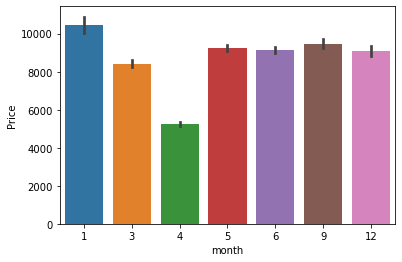

In [23]:
#In which month flight fare is maximum?
sns.barplot(x='month',y='Price',data=data_eda)
plt.show()

In [24]:
"Most expensive flight fare is in January month. and lowest is April."

'Most expensive flight fare is in January month. and lowest is April.'

<Figure size 720x1080 with 0 Axes>

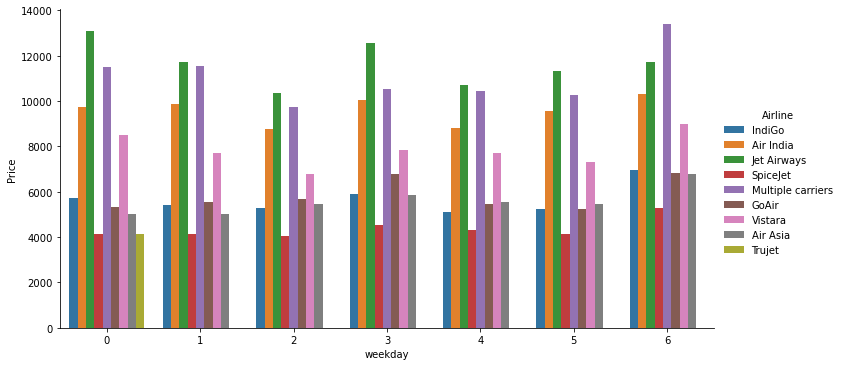

In [25]:
#On what weekday which airline's price is most high?
plt.figure(figsize=(10,15))
sns.catplot(x='weekday', y='Price', hue='Airline', data=data_eda, kind='bar', aspect=2,ci=None)
plt.show()

In [26]:
"Jet Airways airlines are most expensive all weekdays except for sunday, Multiple carriers is most expensive."

'Jet Airways airlines are most expensive all weekdays except for sunday, Multiple carriers is most expensive.'

In [27]:
#Does price Varies with airline?
airline_price_data = data_eda.groupby('Airline')['Price'].sum().sort_values(ascending=False)
airline_price_data

Airline
Jet Airways          43266530
Air India            16188894
Multiple carriers    13188048
IndiGo               11580684
Vistara               3755935
SpiceJet              3533711
Air Asia              1783293
GoAir                 1137045
Trujet                   4140
Name: Price, dtype: int64

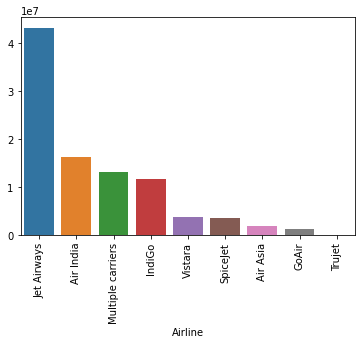

In [28]:
sns.barplot(x=airline_price_data.index, y=airline_price_data.values)
plt.xticks(rotation=90)
plt.show()

In [29]:
"Most expensive airline is Jet Airways."

'Most expensive airline is Jet Airways.'

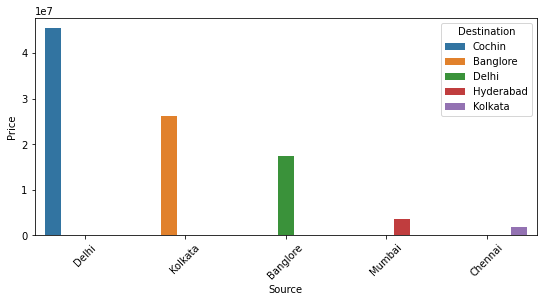

In [30]:
#What is price difference between different sources and destinations?
airline_price_data = data_eda.groupby(['Source', 'Destination'])['Price'].sum().reset_index()

# Sort the data by total price in descending order
airline_price_data = airline_price_data.sort_values(by='Price', ascending=False)

plt.figure(figsize=(9,4))
sns.barplot(x='Source', y='Price', hue='Destination', data=airline_price_data)
plt.xticks(rotation=45)
plt.show()

In [31]:
#Flights between Delhi to cochin is most expensive followed by Kolkatta to Banglore.

In [32]:
data_eda['Total_Stops']=data_eda['Total_Stops'].astype('int64')

In [33]:
data_eda.pivot_table(values='Price', index='Total_Stops', columns='Airline', aggfunc='mean')

Airline,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Trujet,Vistara
Total_Stops,,,,,,,,,
0,4492.331492,5600.552885,4726.173913,4714.865963,6173.384244,NaN,3800.041979,NaN,6327.398496
1,7078.325581,9041.509259,6884.676471,7104.717528,12592.034659,10719.259067,6750.560811,4140.0,9641.148837
2,6341.888889,12146.860399,NaN,7507.526316,13679.833028,14809.395349,NaN,NaN,NaN
3,NaN,12339.057143,NaN,NaN,NaN,17292.750000,NaN,NaN,NaN
4,NaN,17686.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


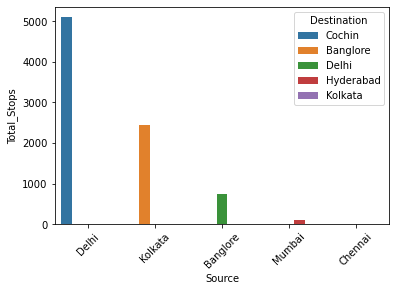

In [34]:
airline_price_data = data_eda.groupby(['Source','Destination'])['Total_Stops'].sum().reset_index()
airline_price_data=airline_price_data.sort_values(by='Total_Stops',ascending=False)
sns.barplot(x='Source', y='Total_Stops', hue='Destination', data=airline_price_data)
plt.xticks(rotation=45)
plt.show()

In [35]:
def duration(data,column,col_value):
    source=data_eda[data_eda[column]==col_value]
    groupby=source.groupby(['Source','Destination'])['Duration_Total_Hour'].mean().reset_index()
    groupby=groupby.sort_values(by='Duration_Total_Hour',ascending=False)
    sns.barplot(x='Source',y='Duration_Total_Hour',hue='Destination',data=groupby)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

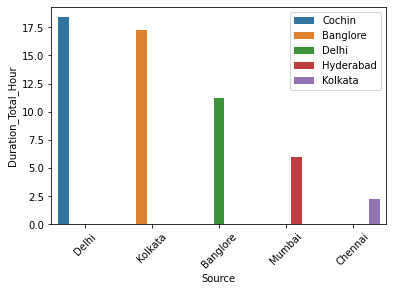

In [36]:
duration(data=data_eda,column='Airline',col_value='Air India')

In [37]:
"Most duration is between Delhi to Cochin, followed by Kolkata to Banglore."

'Most duration is between Delhi to Cochin, followed by Kolkata to Banglore.'

In [38]:
#Relationship between source to destination on the basis of airline and price
def source(data,Sourcecity,city):
    source=data[data[Sourcecity]==city]
    s=source.groupby(['Source','Airline','Destination'])['Price'].mean().reset_index()
    s=s.sort_values(by='Price',ascending=False)
    sns.barplot(x='Source',y='Price',hue='Airline',data=s)
    return s

,Source,Airline,Destination,Price
4,Delhi,Jet Airways,Cochin,12677.829167
5,Delhi,Multiple carriers,Cochin,10908.228288
1,Delhi,Air India,Cochin,9960.348506
0,Delhi,Air Asia,Cochin,7804.175000
3,Delhi,IndiGo,Cochin,7203.933333
2,Delhi,GoAir,Cochin,6587.157895
7,Delhi,Vistara,Cochin,6465.644444
6,Delhi,SpiceJet,Cochin,5916.356322


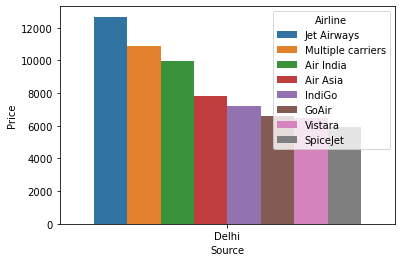

In [39]:
source(data=data_eda,Sourcecity='Source',city='Delhi')

In [40]:
"Cheapest flight from Delhi to Cochin is by SpiceJet"

'Cheapest flight from Delhi to Cochin is by SpiceJet'

In [51]:
data_eda.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'day', 'month', 'weekday',
       'Arrival_Time_hour', 'Arrival_Time_minutes', 'Duration_Total_Hour'],
      dtype='object')

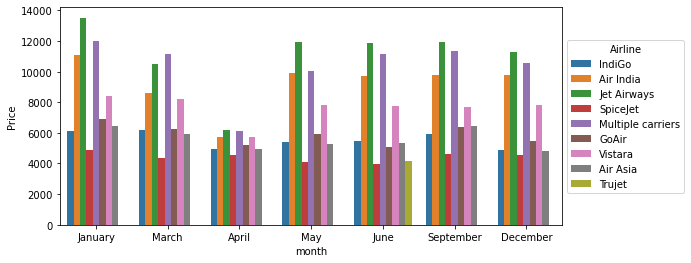

In [41]:
plt.figure(figsize=(9,4))
ax=sns.barplot(x='month',y='Price',hue='Airline', data=data_eda,ci=None)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Airline")
sns.set_palette("Set1")
month=['January','March','April','May','June','September','December']
ax.set_xticklabels(month)
plt.show()

In [42]:
"""1.In the month of January prices are higher compared to other months for every airline
2. TruJet is operating only for June month as per the data available.
3. For march month most expensive flight is multiple carriers
4. In the month of april airlines are least expensive.
"""

'1.In the month of January prices are higher compared to other months for every airline\n2. TruJet is operating only for June month as per the data available.\n3. For march month most expensive flight is multiple carriers\n4. In the month of april airlines are least expensive.\n'

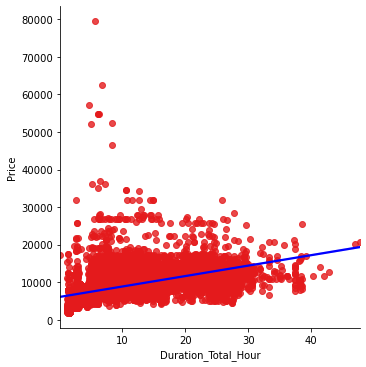

In [43]:
#Finding relation between total duration of journey and price?
sns.lmplot(x='Duration_Total_Hour', y='Price', data=df,line_kws={"color":"Blue"})

<AxesSubplot:>

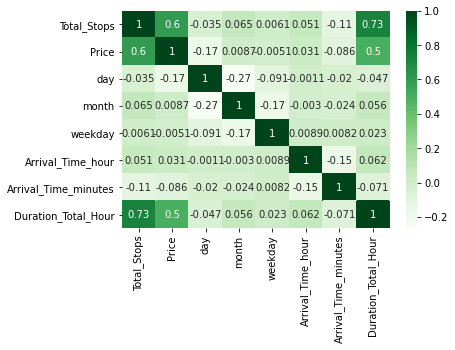

In [44]:
#Correlation
sns.heatmap(data=data_eda.corr(),annot=True,cmap='Greens')

In [45]:
# Due to high correlation Total_stops will be dropped.
data_model.drop("Total_Stops",axis=1,inplace=True)

In [46]:
data_model.drop(['Duration'],axis=1,inplace=True) #deleting this column as we have duration total hours column

In [64]:
data_model.columns

Index(['Price', 'day', 'month', 'weekday', 'Arrival_Time_hour',
       'Arrival_Time_minutes', 'Duration_Total_Hour', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers', 'Airline_SpiceJet', 'Airline_Trujet',
       'Airline_Vistara', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata'],
      dtype='object')

In [65]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [47]:
x=data_model.drop(['Price'],axis=1)
y=data_model['Price']

In [48]:
from sklearn import preprocessing

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

In [55]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test) 

# Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [58]:
lr_predict = lm.predict(x_test)

In [59]:
lr_predict

array([ 5245.31009351,  5615.83175496, 15357.40310423, ...,
       11870.90097754, 13872.55545068, 13527.32580692])

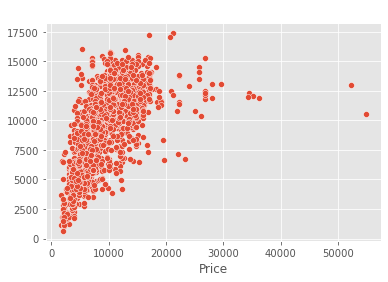

In [61]:
plt.style.use('ggplot')
sns.scatterplot(y_test, lr_predict)
plt.title('Linear Regression')
plt.show()

In [62]:
from sklearn import metrics
r2=metrics.r2_score(y_test,lr_predict)
print('MAE :', metrics.mean_absolute_error(y_test, lr_predict))
print('MSE :', metrics.mean_squared_error(y_test, lr_predict))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, lr_predict)))
print('R-squared:',metrics.r2_score(y_test,lr_predict))

MAE : 2262.7707980953983
MSE : 11731825.458183423
RMSE : 3425.1752448865186
R-squared: 0.46904947842592093


In [63]:
n=data_model.shape[0] #number of observation
k=data_model.shape[1] # number of independent variable 
adjr2=1-((1-r2)*(n-k))/(n-k-1) #Adjusted r squared formula 
print('Adj R-Sqaured:',adjr2)

Adj R-Sqaured: 0.468998611351618


# Decision Tree Regressor 

In [181]:
# Performing GridSearchCV on Decision Tree Regression
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [183]:
tree=DecisionTreeRegressor(max_depth=9)

In [184]:
tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [185]:
print("Training Score: {}".format(tree.score(x_train,y_train)))

Training Score: 0.827613518765057


In [182]:
tree.best_params_

{'max_depth': 9}

In [186]:
# Predicting
predict = tree.predict(x_test)

In [187]:
print('Decision Tree Regressor')
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))
print ('R-sqaured:',metrics.r2_score(y_test,predict))

Decision Tree Regressor
MAE: 1513.4389506000728
MSE: 5205737.367577394
RMSE: 2281.608504449743
R-sqaured: 0.7562637274553545


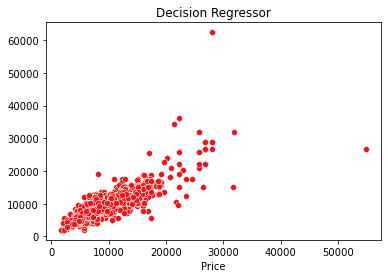

In [188]:
sns.scatterplot(y_test, y_test_pred)
plt.title('Decision Regressor')
plt.show()

# Random Forest Regressor

# Hyper Parameter Tuning

In [131]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [138]:
n_estimators=[int(n) for n in np.linspace(10,300,10)]
max_depth=[int(x) for x in np.linspace(10,300,10)]
min_samples_split=[2,4,6,8,10,12,14,16]
min_samples_leaf=[1,3,5,7,9,11]
max_features=['sqrt','log','auto',None]

random_search= {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features,
    
}

random_search

{'n_estimators': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300],
 'max_depth': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300],
 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16],
 'min_samples_leaf': [1, 3, 5, 7, 9, 11],
 'max_features': ['sqrt', 'log', 'auto', None]}

In [139]:
rfr=RandomForestRegressor()

In [140]:
rfr_random= RandomizedSearchCV(estimator=rfr,param_distributions=random_search,
                              n_iter=10, cv=5)

In [141]:
rfr_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 42, 74, 106, 138, 171,
                                                      203, 235, 267, 300],
                                        'max_features': ['sqrt', 'log', 'auto',
                                                         None],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16],
                                        'n_estimators': [10, 42, 74, 106, 138,
                                                         171, 203, 235, 267,
                                                         300]})

In [161]:
print("Training Score: {}".format(rfr_random.score(x_train,y_train)))

Training Score: 0.8471220397438728


In [142]:
rfr_random.best_params_

{'n_estimators': 106,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_features': None,
 'max_depth': 106}

In [144]:
predictions=rfr_random.predict(x_test)


In [146]:
predictions

array([ 7826.66129211,  5106.17340161, 16830.66023204, ...,
       12011.2045308 ,  9425.87442725,  4044.62219796])

In [162]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print ('R-sqaured:',metrics.r2_score(y_test,predictions))

MAE: 1295.280632507892
MSE: 3605743.6892071045
RMSE: 1898.879587864145
R-sqaured: 0.8311765530023827


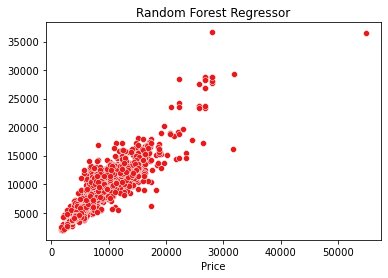

In [163]:
sns.scatterplot(y_test,predictions)
plt.title('Random Forest Regressor')
plt.show()